# Trabajo Práctico 4 - Grupo 2
## Matías Bergerman, Pablo González Leiro, Tobias Demeco, Matías Tripoli

In [2]:
# Import libraries

import cv2
from PIL import Image
from skimage.util import random_noise
import numpy as np
from matplotlib import pyplot as plt

## Ejercicio 1

In [3]:
# From: https://stackoverflow.com/a/51453689

def imadjust(x,a,b,c,d,gamma=1):
    # Similar to imadjust in MATLAB.
    # Converts an image range from [a,b] to [c,d].
    # The Equation of a line can be used for this transformation:
    #   y=((d-c)/(b-a))*(x-a)+c
    # However, it is better to use a more generalized equation:
    #   y=((x-a)/(b-a))^gamma*(d-c)+c
    # If gamma is equal to 1, then the line equation is used.
    # When gamma is not equal to 1, then the transformation is not linear.

    y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
    return y

In [4]:
# Parte B
def transformacion_ejercicio_1(x):
    return (x - 0.25) * 4

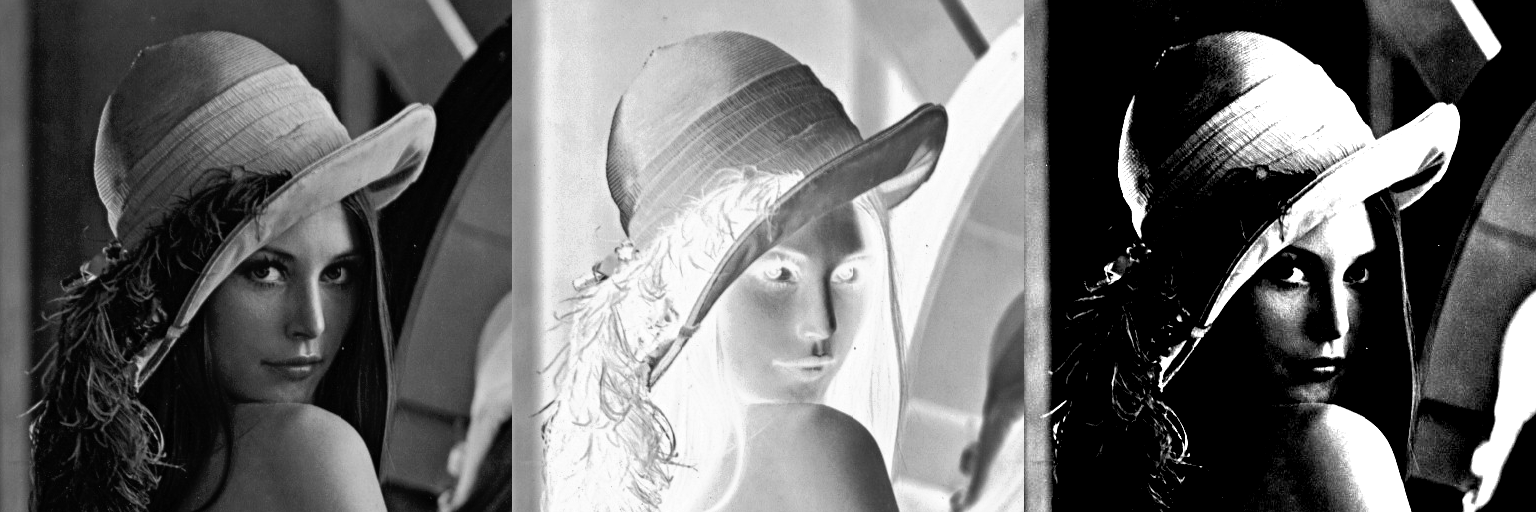

In [5]:
img = cv2.imread('images/lena_gray.tif', cv2.IMREAD_GRAYSCALE)

img_invert = imadjust(img, 0, 255, 255, 0)

img_adjust = transformacion_ejercicio_1(img/255)*255
img_adjust = np.clip(img_adjust, 0, 255)

img_combined = np.concatenate((img, img_invert, img_adjust), axis=1)
display(Image.fromarray(img_combined.astype(np.uint8)))

## Ejercicio 2

## Ejercicio 3
### Bit Plane Slicing

## Ejercicio 4
### Histograma de una imagen

[Explicacion de un histograma]

In [6]:
def img_histogram(x):
    y = np.zeros(256)
    for val in x.flatten():
        y[val] += 1
    return y / np.size(x)

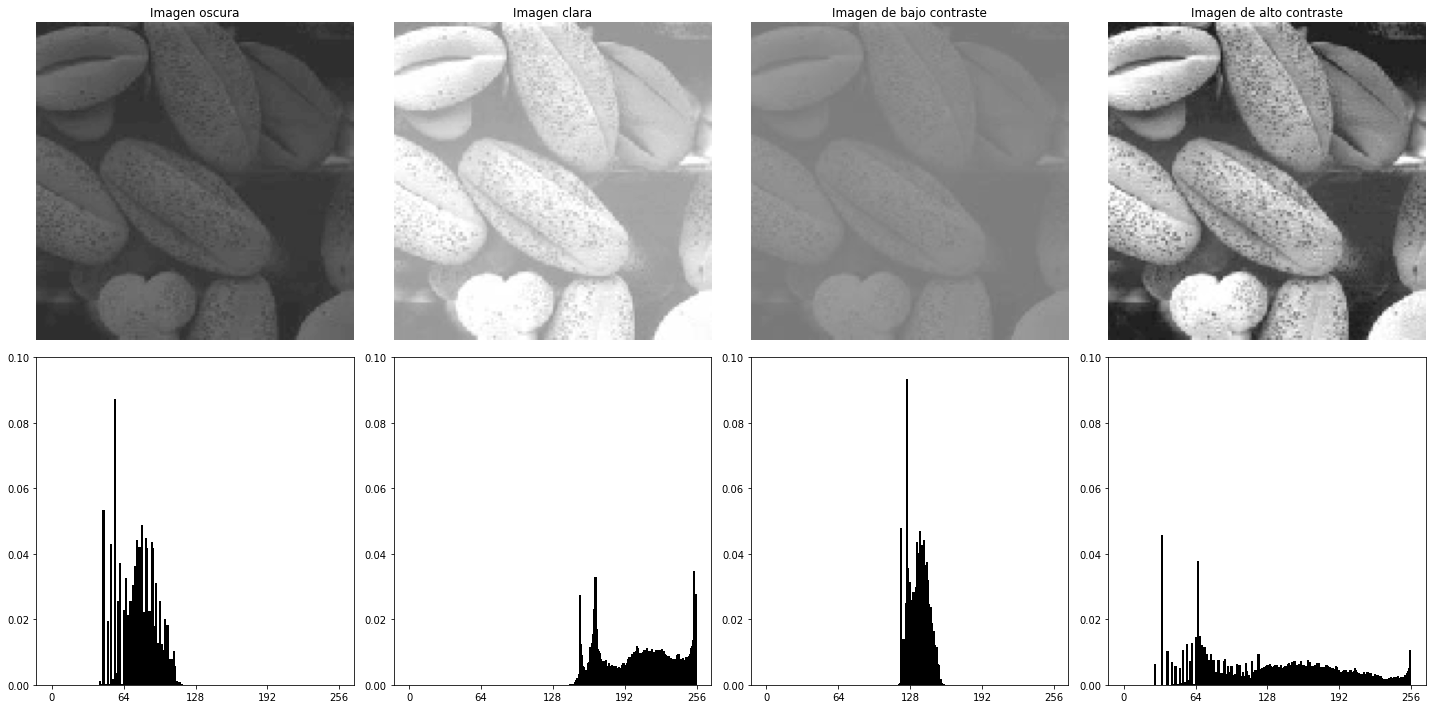

In [7]:
img_dark = cv2.imread('images/dark_image.png', cv2.IMREAD_GRAYSCALE)
img_light = cv2.imread('images/light_image.png', cv2.IMREAD_GRAYSCALE)
img_lc = cv2.imread('images/low_contrast_image.png', cv2.IMREAD_GRAYSCALE)
img_hc = cv2.imread('images/high_contrast_image.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.title('Imagen oscura')
plt.imshow(img_dark, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(2, 4, 5)
plt.bar(range(256), img_histogram(img_dark), color='black', width=2)
plt.ylim((0, 0.1))
plt.xticks([0, 64, 128, 192, 256])

plt.subplot(2, 4, 2)
plt.title('Imagen clara')
plt.imshow(img_light, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(2, 4, 6)
plt.bar(range(256), img_histogram(img_light), color='black', width=2)
plt.ylim((0, 0.1))
plt.xticks([0, 64, 128, 192, 256])

plt.subplot(2, 4, 3)
plt.title('Imagen de bajo contraste')
plt.imshow(img_lc, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(2, 4, 7)
plt.bar(range(256), img_histogram(img_lc), color='black', width=2)
plt.ylim((0, 0.1))
plt.xticks([0, 64, 128, 192, 256])

plt.subplot(2, 4, 4)
plt.title('Imagen de alto contraste')
plt.imshow(img_hc, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(2, 4, 8)
plt.bar(range(256), img_histogram(img_hc), color='black', width=2)
plt.ylim((0, 0.1))
plt.xticks([0, 64, 128, 192, 256])

plt.tight_layout()
plt.show()

## Ejercicio 5
### Brillo y contraste

## Ejercicio 6
### Modificación del brillo y contraste

El Brillo (Brightness) de una imagen (en escala de gris) es la intensidad promedio de todos los pixeles de la imagen:

$$B(I)=\frac{1}{w\cdot h}\displaystyle\sum_{v=1} ^{h} \displaystyle\sum_{u=1} ^{w} I(u, v) $$

Este se puede modificar al aumentar o disminuír el brillo de cada uno de los píxeles en la imagen. Los valores en los límites de la escala de colores se saturarán.

El contraste es la diferencia de brillo entre los objetos de una imagen. Se puede definir una transformación que nos permita mejorar el contraste de una imagen, como la que se ve en la siguiente imagen:

![](https://i0.wp.com/theailearner.com/wp-content/uploads/2019/01/linear_Transform.png?resize=365%2C351&ssl=1)

Esta técnica denominada *contrast stretching*. Aplicando la transformación punto a punto sobre la imagen se obtiene un cambio en el contraste de la imágen.

In [8]:
# Parte A: Brillo

def get_brightness(x):
    return np.mean(x)
    
def add_brightness(x, b):
    y = x.astype(np.float64) + b
    return np.clip(y, 0, 255).astype(np.uint8)

Brightness 1: 64.8720474243164
Brightness 2: 114.8649673461914
Brightness 3: 27.56143569946289


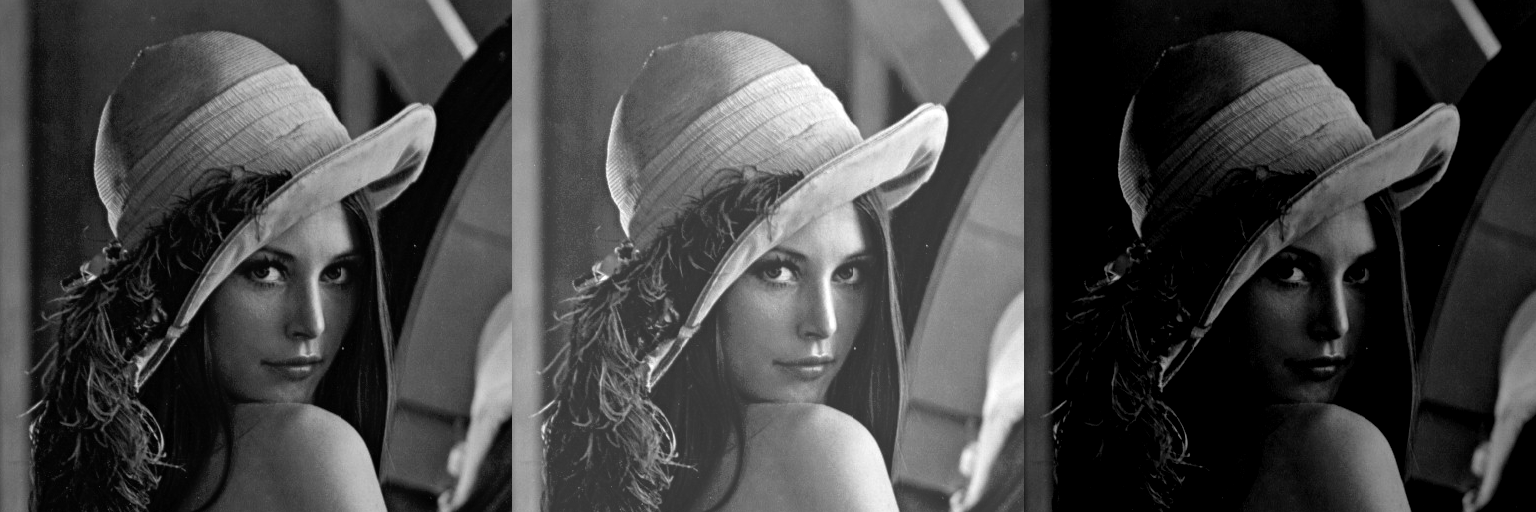

In [9]:
img = cv2.imread('images/lena_gray.tif', cv2.IMREAD_GRAYSCALE)

img_light = add_brightness(img, 50)
img_dark = add_brightness(img, -50)

print('Brightness 1:', get_brightness(img))
print('Brightness 2:', get_brightness(img_light))
print('Brightness 3:', get_brightness(img_dark))

img_combined = np.concatenate((img, img_light, img_dark), axis=1)
display(Image.fromarray(img_combined.astype(np.uint8)))

In [10]:
# Parte B: Contraste

def imadjust(x,a,b,c,d,gamma=1):
    return (((x - a) / (b - a)) ** gamma) * (d - c) + c

def stretch_contrast(x, low_in=0.01, high_in=0.99, low_out=0.0, high_out=1.0):
    # low_in, low_out = r1, s1
    # high_in, high_out = r2, s2
    r1, r2, s1, s2 = 255*low_in, 255*high_in, 255*low_out, 255*high_out

    def T(r):
        if r < r1:
            return imadjust(r, 0, r1, 0, s1)
        elif r < r2:
            return imadjust(r, r1, r2, s1, s2)
        else:
            return imadjust(r, r2, 255, s2, 255)

    y = [T(r) for r in x.flatten()]

    return np.array(y).reshape(x.shape)

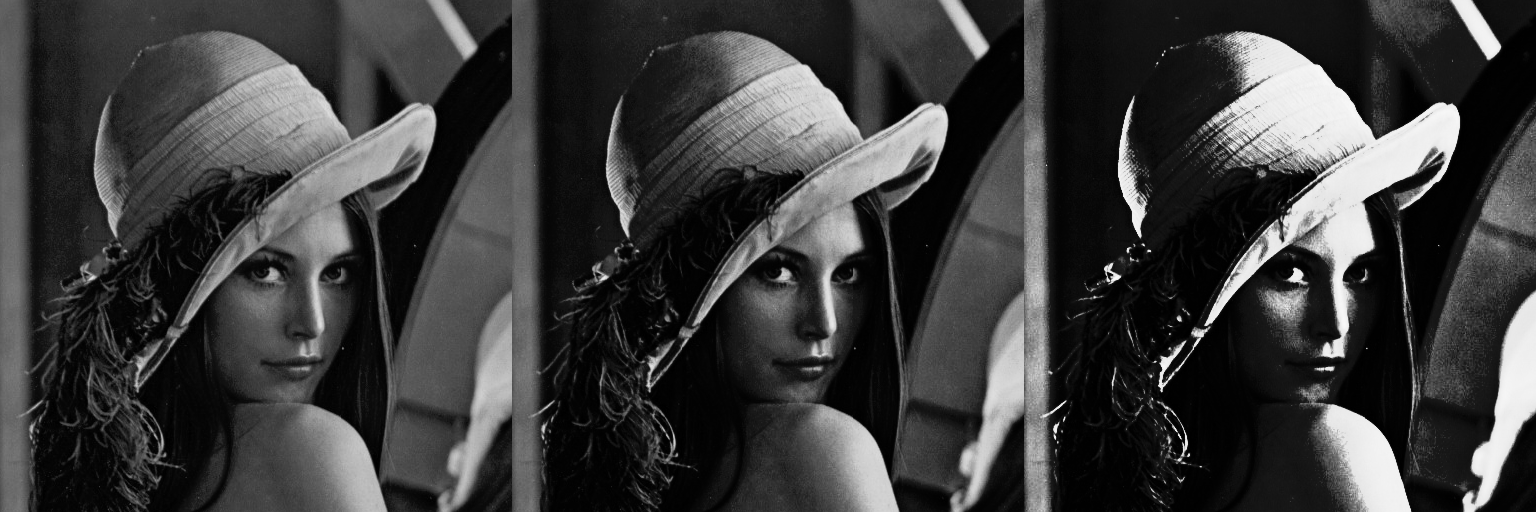

In [11]:
img = cv2.imread('images/lena_gray.tif', cv2.IMREAD_GRAYSCALE)

img_contrast_1 = stretch_contrast(img, .2, .7, .1, .8)
img_contrast_2 = stretch_contrast(img, .3, .5, .1, .9)

img_combined = np.concatenate((img, img_contrast_1, img_contrast_2), axis=1)
display(Image.fromarray(img_combined.astype(np.uint8)))

## Ejercicio 7
### Ecualización de un histograma

## Ejercicio 8
### High Dynamic Range (HDR) Imaging

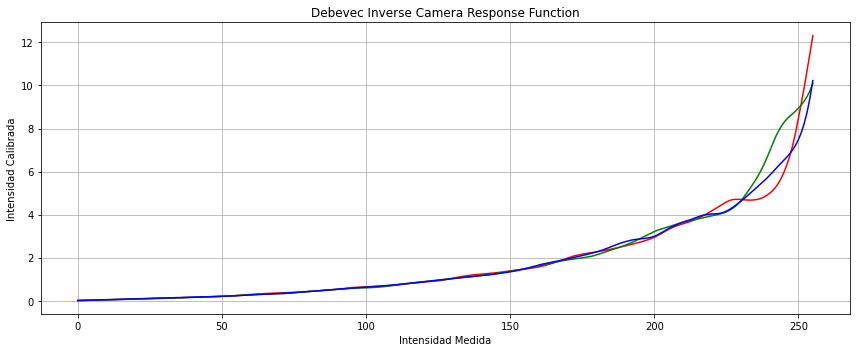

(600, 903, 3) (600, 903, 3) (600, 903, 3)
255.0 255.0 nan


ValueError: unrecognized image mode

In [55]:
# List of exposure times
times = np.array([ 1/30, 1/10, 1/3, 0.62, 1.3, 4 ], dtype=np.float32)

# List of images
images = []
for i in range(1, 7):
    images.append( cv2.imread(f'images/HDR images/office_{i}.jpg') )

# Align input images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

# Obtain Camera Response Function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# Plot inverse CRF
plt.figure(figsize=(12, 5))
plt.title('Debevec Inverse Camera Response Function')
plt.plot(responseDebevec[:,0,0], 'red')
plt.plot(responseDebevec[:,0,1], 'green')
plt.plot(responseDebevec[:,0,2], 'blue')
plt.ylabel('Intensidad Calibrada')
plt.xlabel('Intensidad Medida')
plt.grid()
plt.tight_layout()
plt.show()

# Merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 255 * ldrDrago

# Tonemap using Durand's method obtain 24-bit color image
#tonemapDurand = cv2.createTonemapDurand(1.5,4,1.0,1,1)
#ldrDurand = tonemapDurand.process(hdrDebevec)
#ldrDurand = 255 * ldrDurand

# Tonemap using Reinhard's method to obtain 24-bit color image
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec) * 255

# Tonemap using Mantiuk's method to obtain 24-bit color image
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 255 * ldrMantiuk

print(ldrDrago.shape, ldrReinhard.shape, ldrMantiuk.shape)
print(ldrDrago.max(), ldrReinhard.max(), ldrMantiuk.max())

# Display HDR image.
display(Image.fromarray(ldrDrago.astype(np.uint8), mode="BGR"))
display(Image.fromarray(ldrReinhard.astype(np.uint8), mode="BGR"))
display(Image.fromarray(ldrMantiuk.astype(np.uint8), mode="BGR"))
